## INDEX

0. [Introduction](#introduction)
1. [Importing libraries](#importing-libraries)
2. [Data collection](#data-collection)
3. [Dataset selection](#dataset-selection)
    - [Selected dataset](#selected-dataset)
4. [Data cleaning](#data-cleaning)
5. [Deep dive](#deep-dive)

## Introduction

**About Dataset**

Context:

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly $327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching $400 billion dollars annually.

Content:

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 3 files:

1. **diabetes_012_health_indicators_BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables

2. **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

3. **diabetes_binary_health_indicators_BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

Explore some of the following research questions:

- Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?
- What risk factors are most predictive of diabetes risk?
- Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
- Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?

## Importing libraries

Back to [Index](#index)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

## Data collection
Back to [Index](#index)

The dataset is from Kaggle:

- Link of the dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

The dataset contains 3 csv files:

1. diabetes_binary_5050split_health_indicators_BRFSS2015.csv
2. diabetes_012_health_indicators_BRFSS2015.csv
3. diabetes_binary_health_indicators_BRFSS2015.csv

In [2]:
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
#pd.options.display.float_format = '{:,.2f}'.format
print("Path to dataset files:", path)

Path to dataset files: /home/vscode/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1


In [3]:
files = os.listdir(path)
print("Archivos en el dataset:", files)

Archivos en el dataset: ['diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_012_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv']


## Dataset selection
Back to [Index](#index)

In [4]:
dataset_path = os.path.join(path, "diabetes_binary_health_indicators_BRFSS2015.csv")
data = pd.read_csv(dataset_path)
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
dataset_path = os.path.join(path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data_2 = pd.read_csv(dataset_path)
data_2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
dataset_path = os.path.join(path, "diabetes_012_health_indicators_BRFSS2015.csv")
data_3 = pd.read_csv(dataset_path)
data_3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
print(f'diabetes_binary_health_indicators_BRFSS2015.csv: \n {data.info()} \n\n')
print(f'diabetes_binary_5050split_health_indicators_BRFSS2015.csv: \n {data_2.info()} \n\n')
print(f'diabetes_012_health_indicators_BRFSS2015.csv: \n {data_3.info()} \n\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

- Duplicated values:

In [8]:
print(f" Total of {data.duplicated().sum()} duplicated values in diabetes_binary_health_indicators_BRFSS2015.csv. \n")
print(f" Total of {data_2.duplicated().sum()} duplicated values in diabetes_binary_5050split_health_indicators_BRFSS2015.csv. \n")
print(f" Total of {data_3.duplicated().sum()} duplicated values in diabetes_012_health_indicators_BRFSS2015.csv. \n")

 Total of 24206 duplicated values in diabetes_binary_health_indicators_BRFSS2015.csv. 

 Total of 1635 duplicated values in diabetes_binary_5050split_health_indicators_BRFSS2015.csv. 

 Total of 23899 duplicated values in diabetes_012_health_indicators_BRFSS2015.csv. 



In [9]:
num_cols_d1 = data.select_dtypes(include=["number"]).columns
cat_cols_d1 = data.select_dtypes(exclude=["number"]).columns

num_cols_d2 = data_2.select_dtypes(include=["number"]).columns
cat_cols_d2 = data_2.select_dtypes(exclude=["number"]).columns

num_cols_d3 = data_3.select_dtypes(include=["number"]).columns
cat_cols_d3 = data_3.select_dtypes(exclude=["number"]).columns

print(f'{cat_cols_d1} \n')
print(f'{cat_cols_d2} \n')
print(f'{cat_cols_d3} \n')

Index([], dtype='object') 

Index([], dtype='object') 

Index([], dtype='object') 



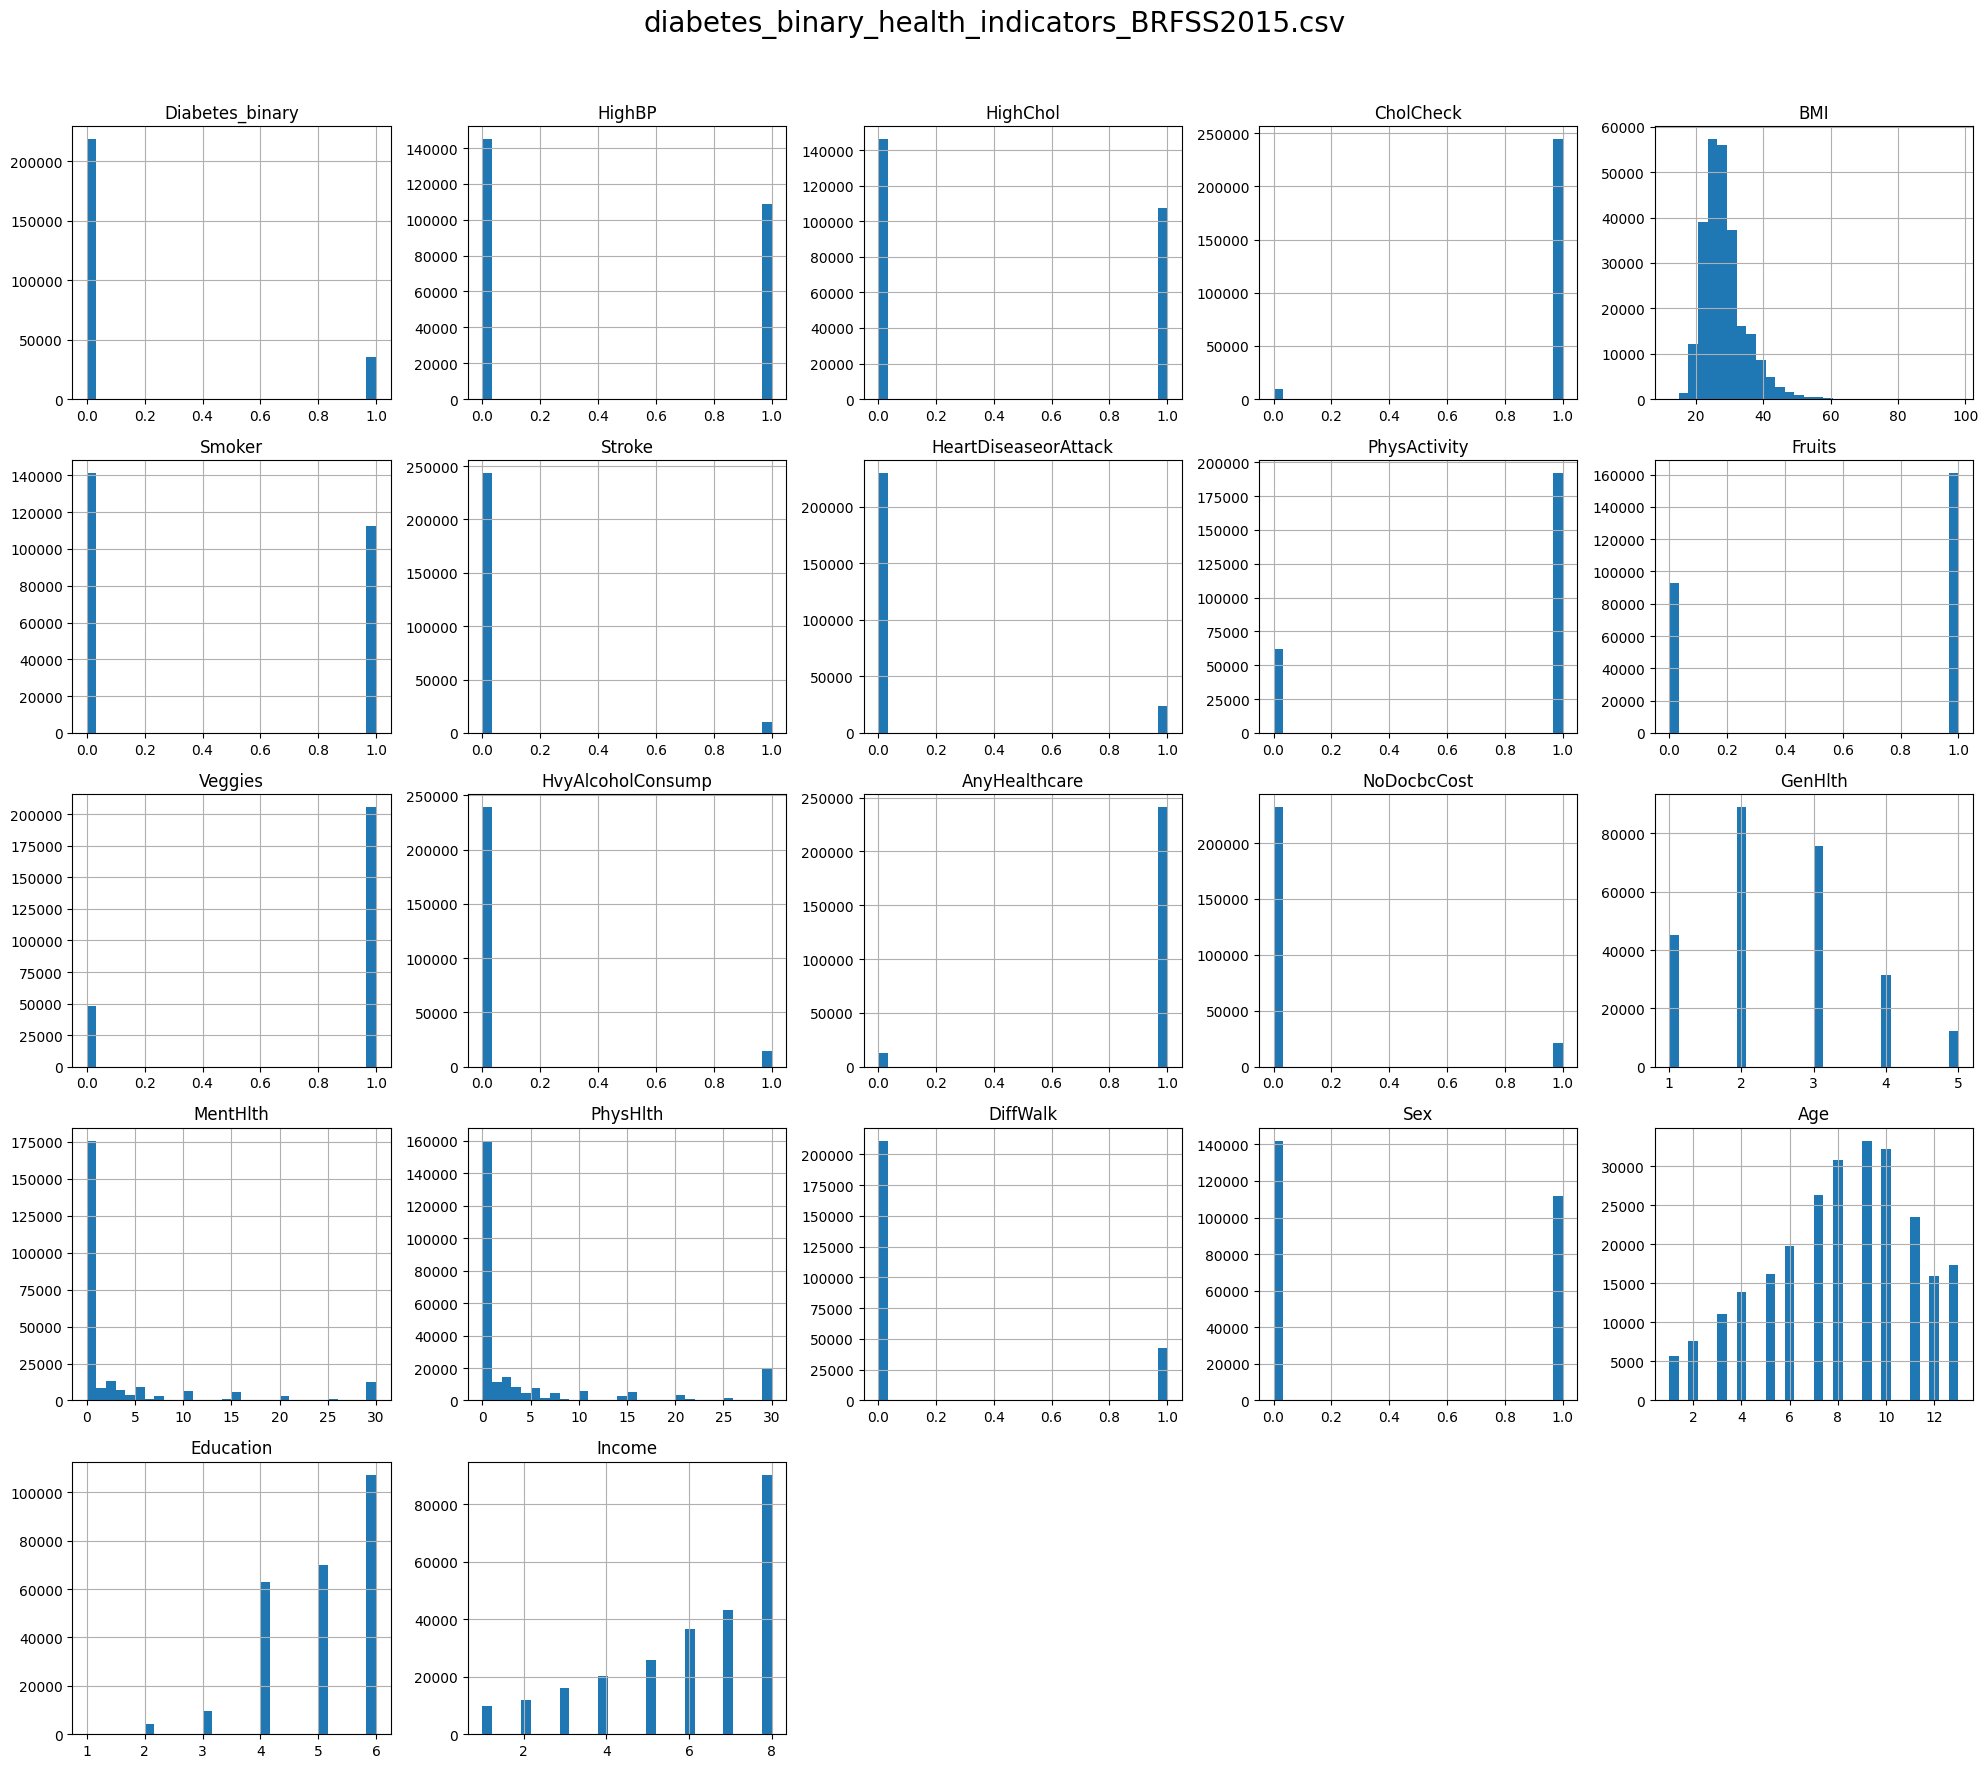

In [10]:
data[num_cols_d1].hist(figsize=(20, 18), bins=30)

plt.suptitle("diabetes_binary_health_indicators_BRFSS2015.csv", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/diabetes_binary_health_indicators_BRFSS2015_columns_graphs.jpg")

plt.show()

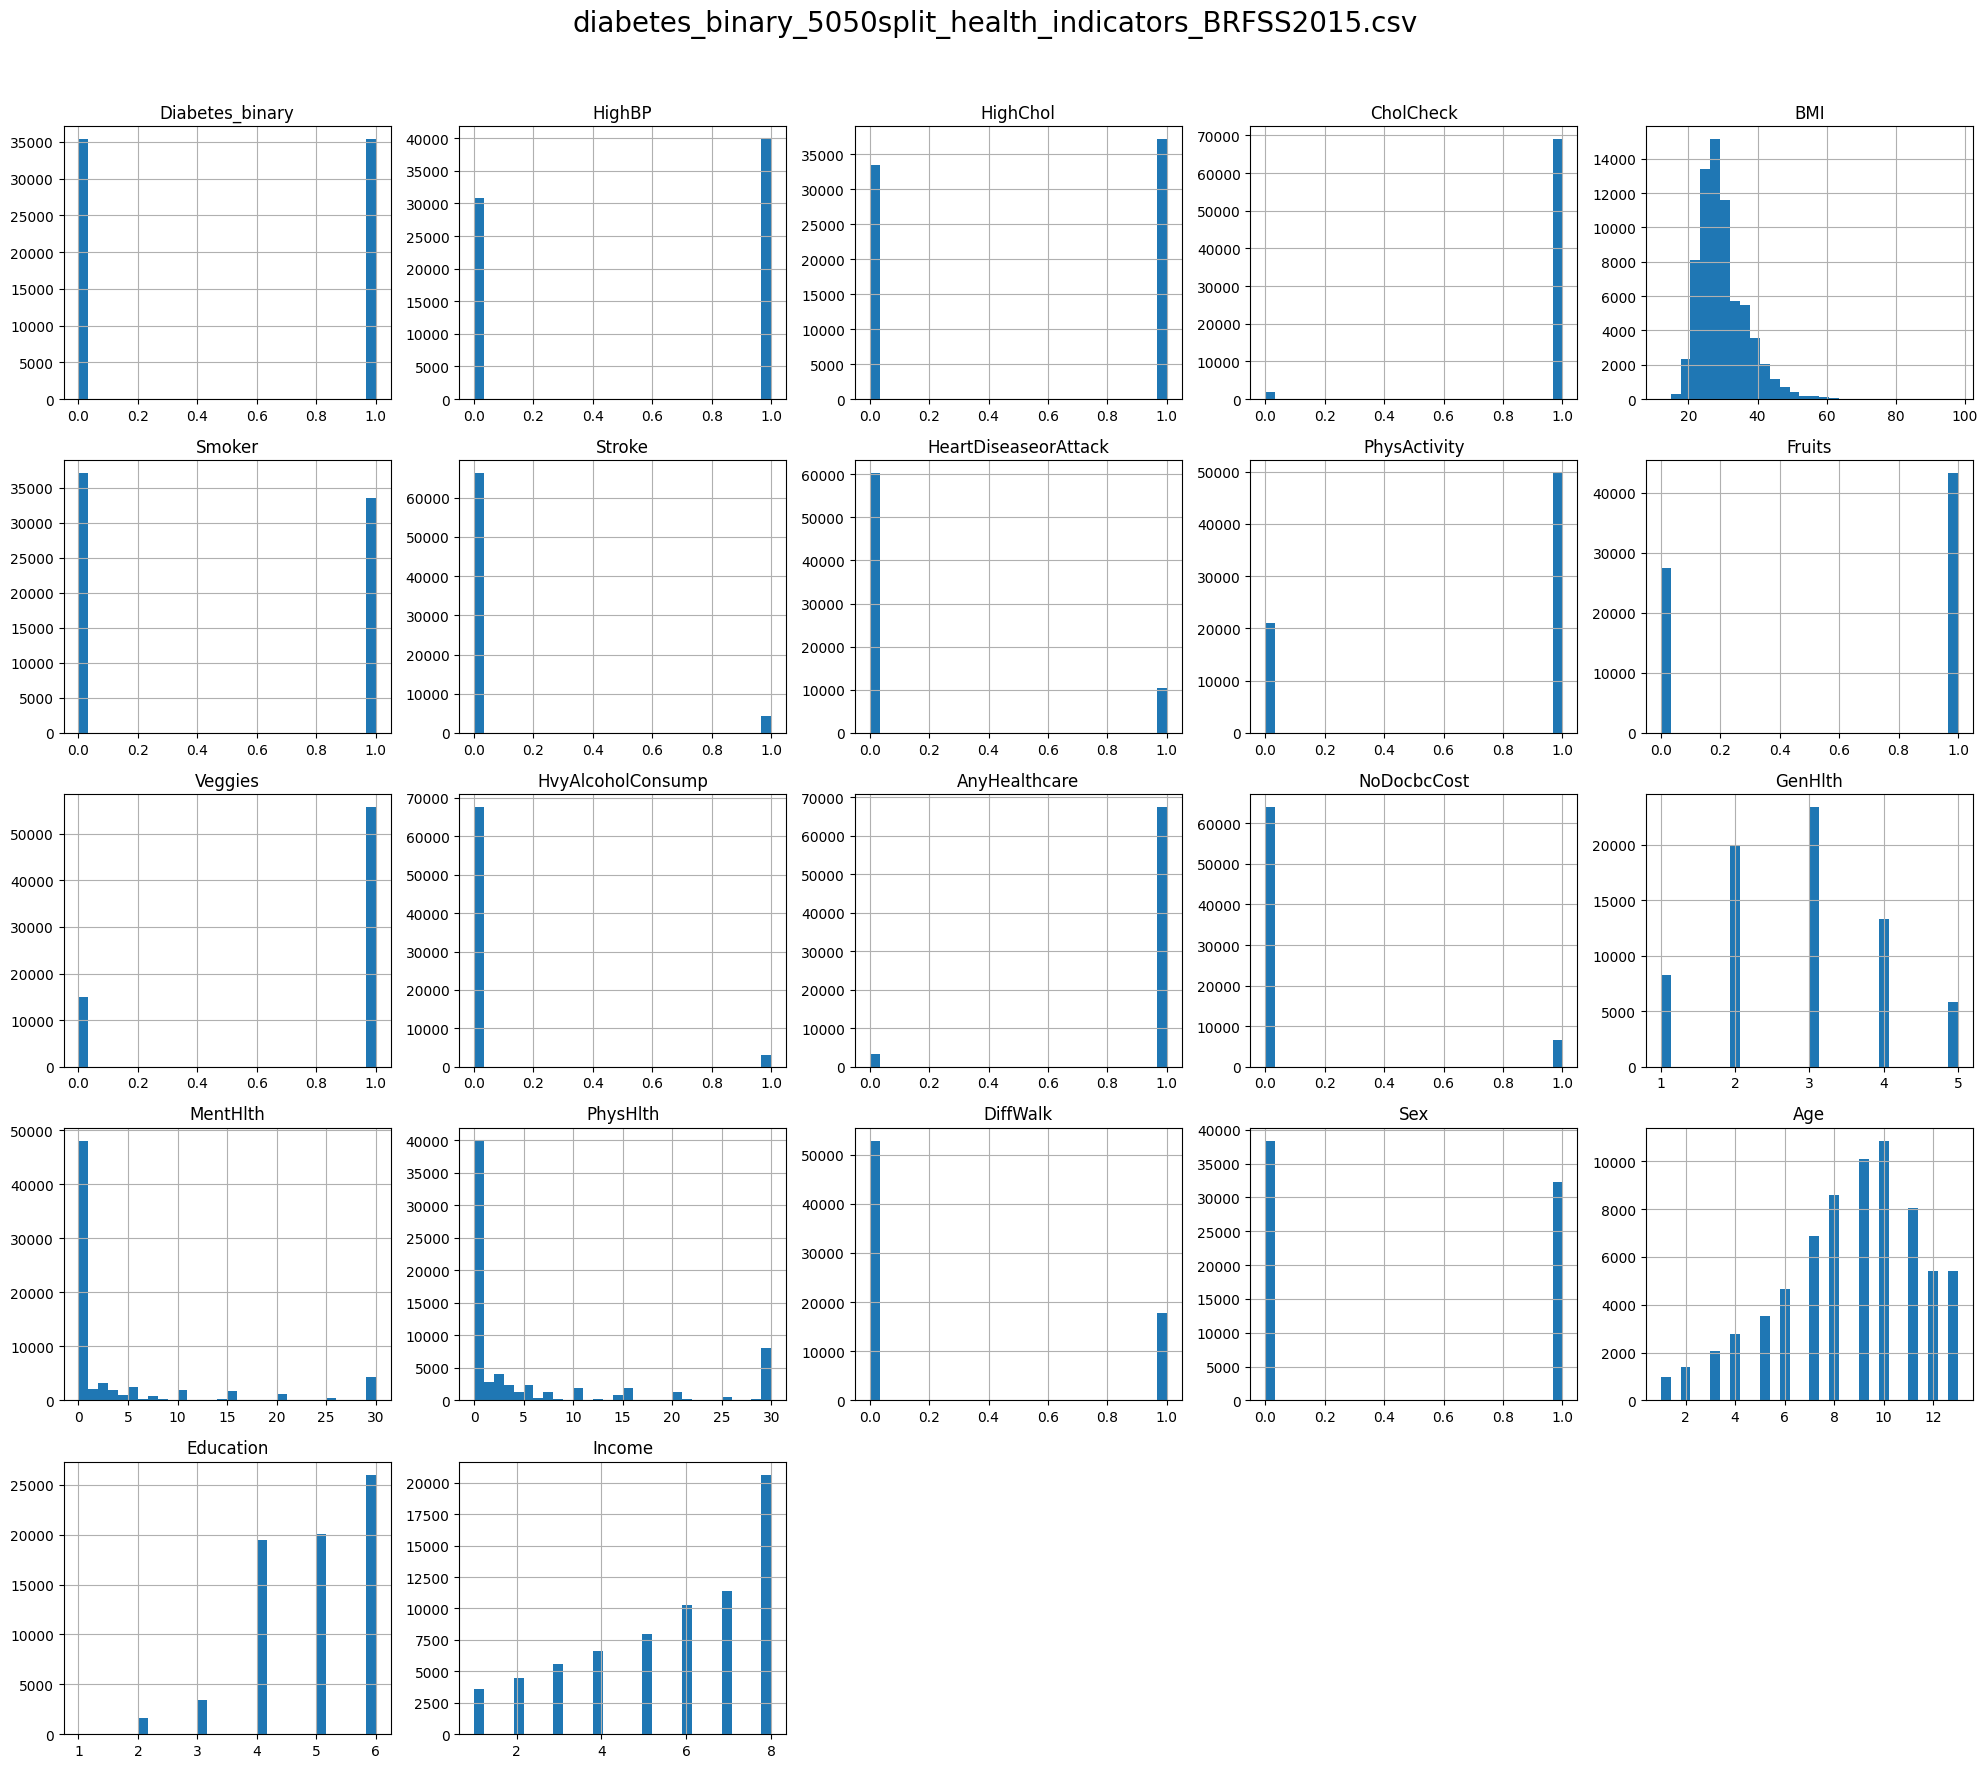

In [11]:
data_2[num_cols_d2].hist(figsize=(20, 18), bins=30)

plt.suptitle("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/diabetes_binary_5050split_health_indicators_BRFSS2015_columns_graphs.jpg")

plt.show()

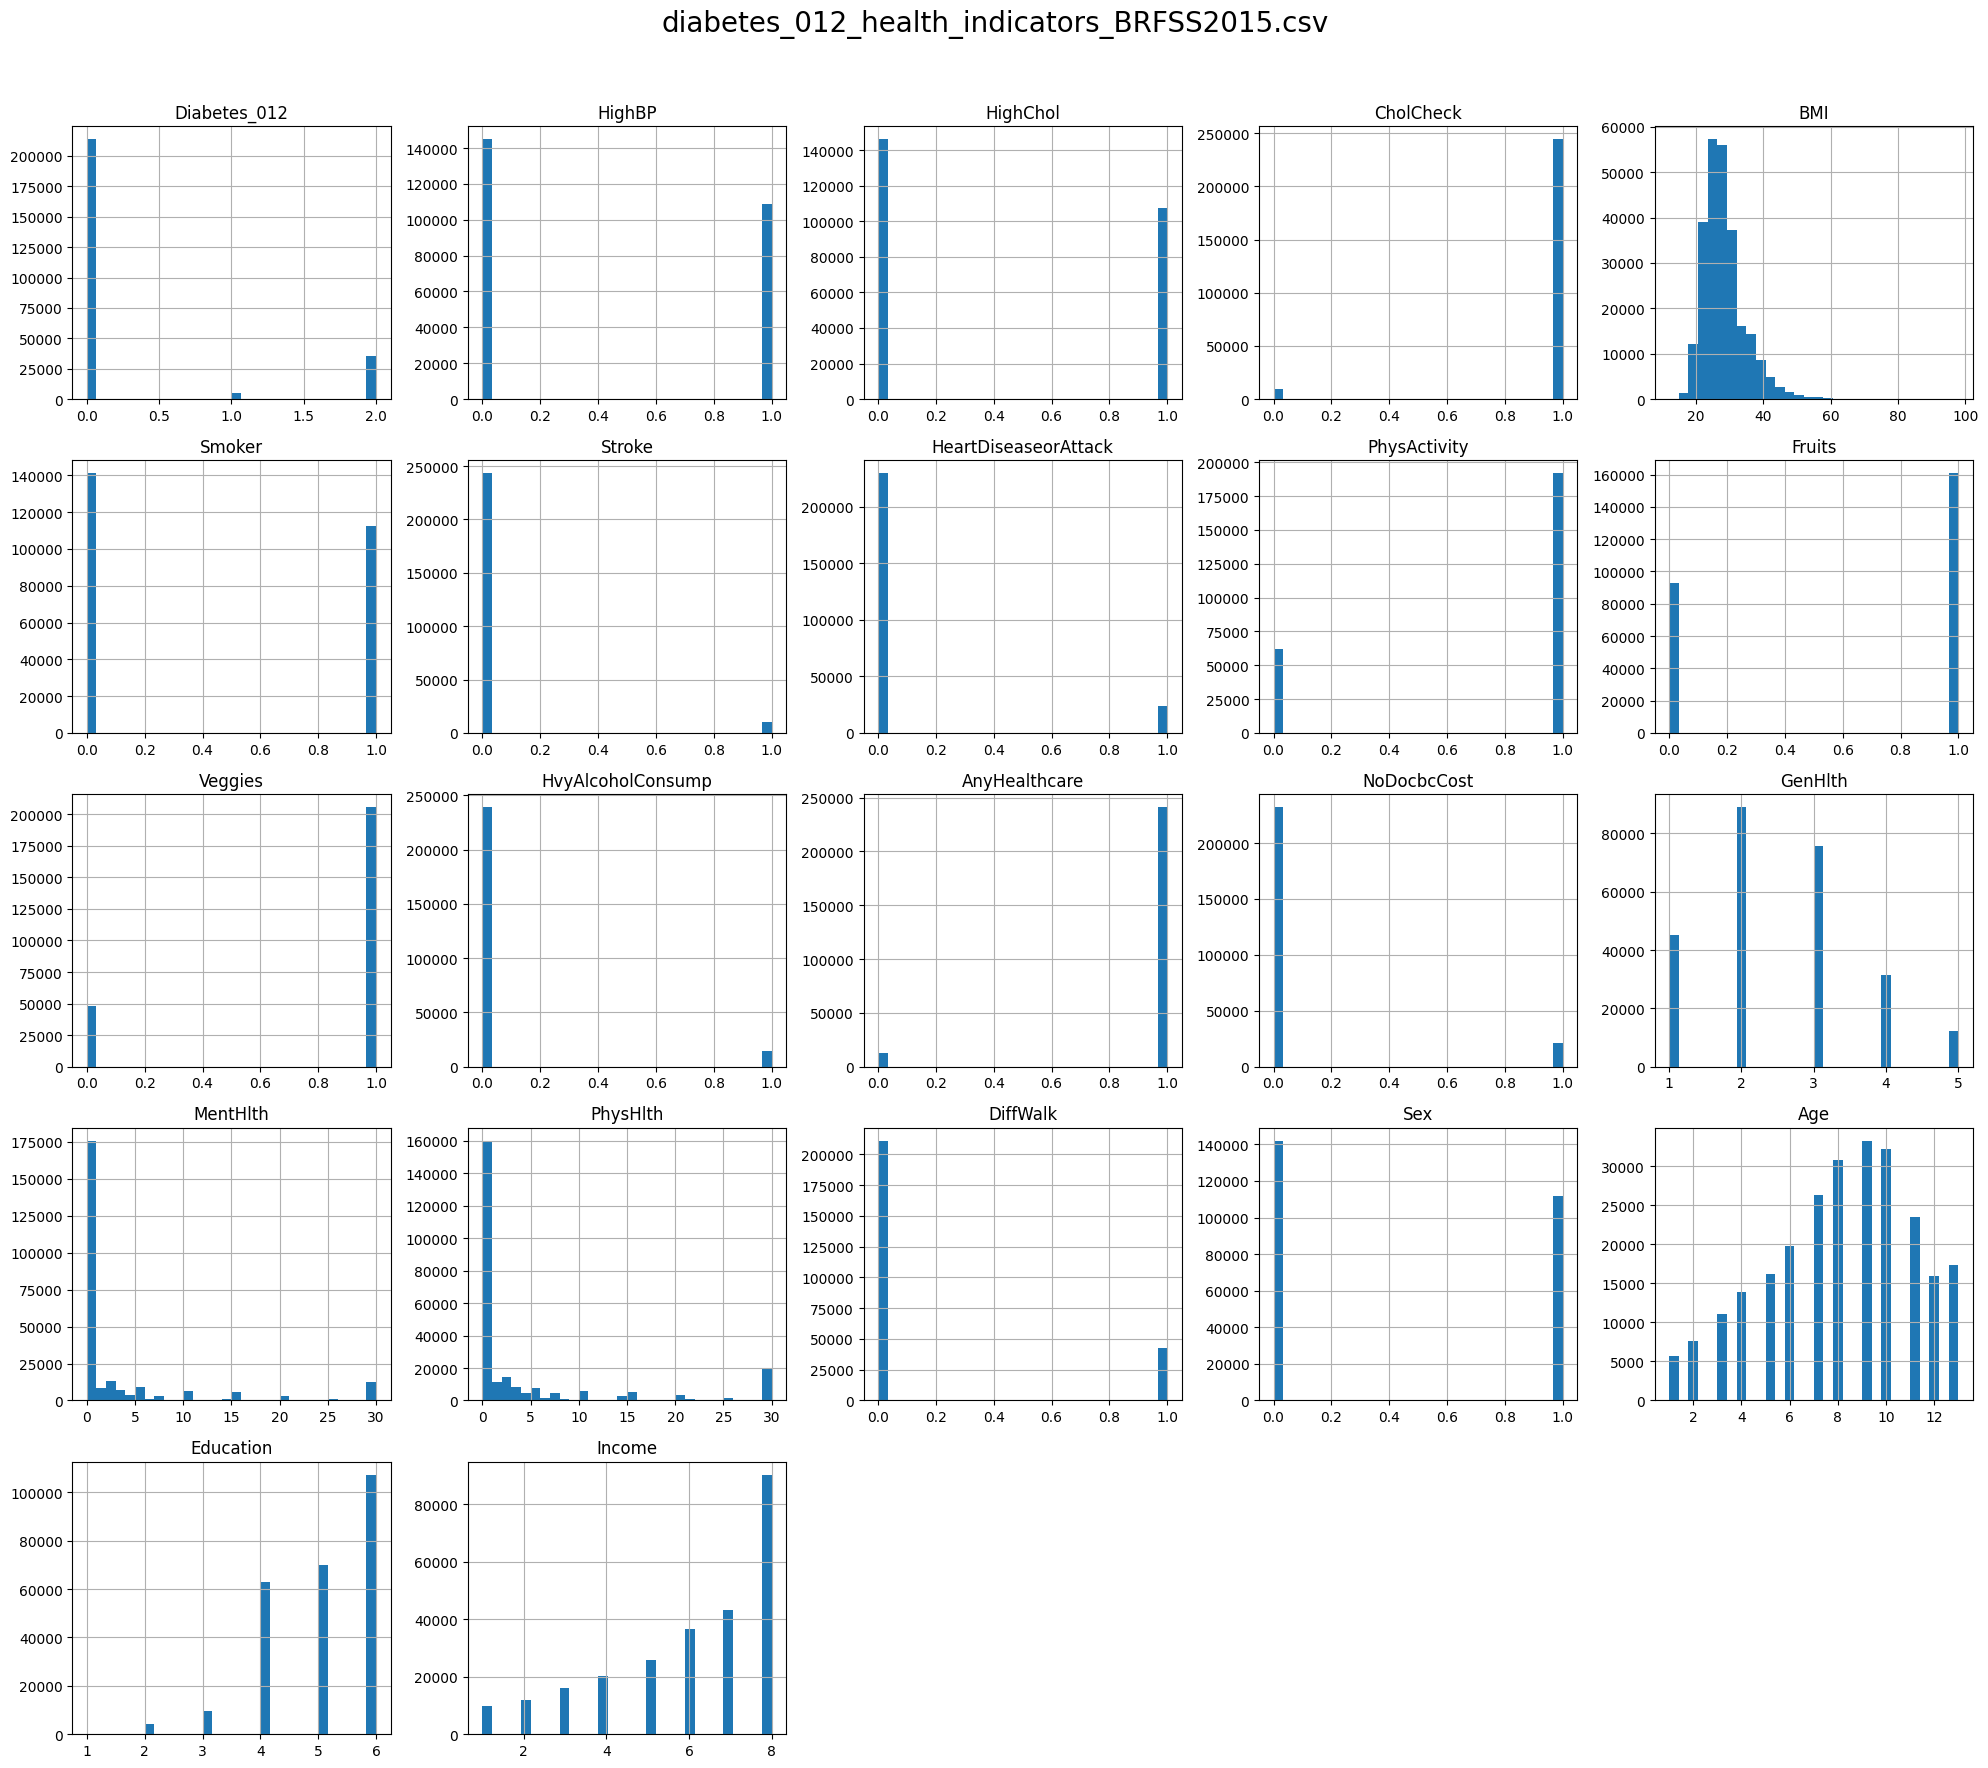

In [12]:
data_3[num_cols_d3].hist(figsize=(20, 18), bins=30)

plt.suptitle("diabetes_012_health_indicators_BRFSS2015.csv", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/diabetes_012_health_indicators_BRFSS2015_columns_graphs.jpg")

plt.show()

# Selected dataset

Back to [Index](#index)


We will use **diabetes_binary_health_indicators_BRFSS2015.csv**, why?
- 253,680 rows.
- Target Variable: Diabetes_binary (0 → No, 1 → Yes) — clean binary classification.
- Highly imbalanced (lots of 0s) — realistic, as diabetes is less common than non-diabetes.
- Great for building a model to detect diabetes risk using real-world skewed data.
- Real-world realism preserved.

Why not **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** or **diabetes_012_health_indicators_BRFSS2015.csv** 

- **diabetes_binary_5050split_health_indicators_BRFSS2015.csv**
    - Only 70,692 rows
    - Downsampled non-diabetics — we lose real-world info.
    - Introduces bias if used alone.
    - Bad for EDA or realism.

- **diabetes_012_health_indicators_BRFSS2015.csv**
    - Target: Diabetes_012 (0 → no diabetes, 1 → prediabetes, 2 → diabetes)
    - Multiclass classification.
    - Severely imbalanced.
    - Needs heavy balancing.

## Data cleaning
Back to [Index](#index)

In [13]:
print(f" Total of {data.duplicated().sum()} duplicated values in diabetes_binary_health_indicators_BRFSS2015.csv. \n")

 Total of 24206 duplicated values in diabetes_binary_health_indicators_BRFSS2015.csv. 



In [14]:
duplicates = data[data.duplicated(keep=False)]
duplicates.sample(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
23433,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
96197,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
151076,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,7.0
176152,0.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,13.0,4.0,5.0
142228,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,7.0
207781,0.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
189930,0.0,1.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
220574,0.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0
140783,0.0,0.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
189333,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [15]:
duplicate_count = data.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_count}")

data_cleaned = data.drop_duplicates()

print(f"Shape before: {data.shape}, after deduplication: {data_cleaned.shape}")

Number of exact duplicate rows: 24206
Shape before: (253680, 22), after deduplication: (229474, 22)


In [16]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  MentH

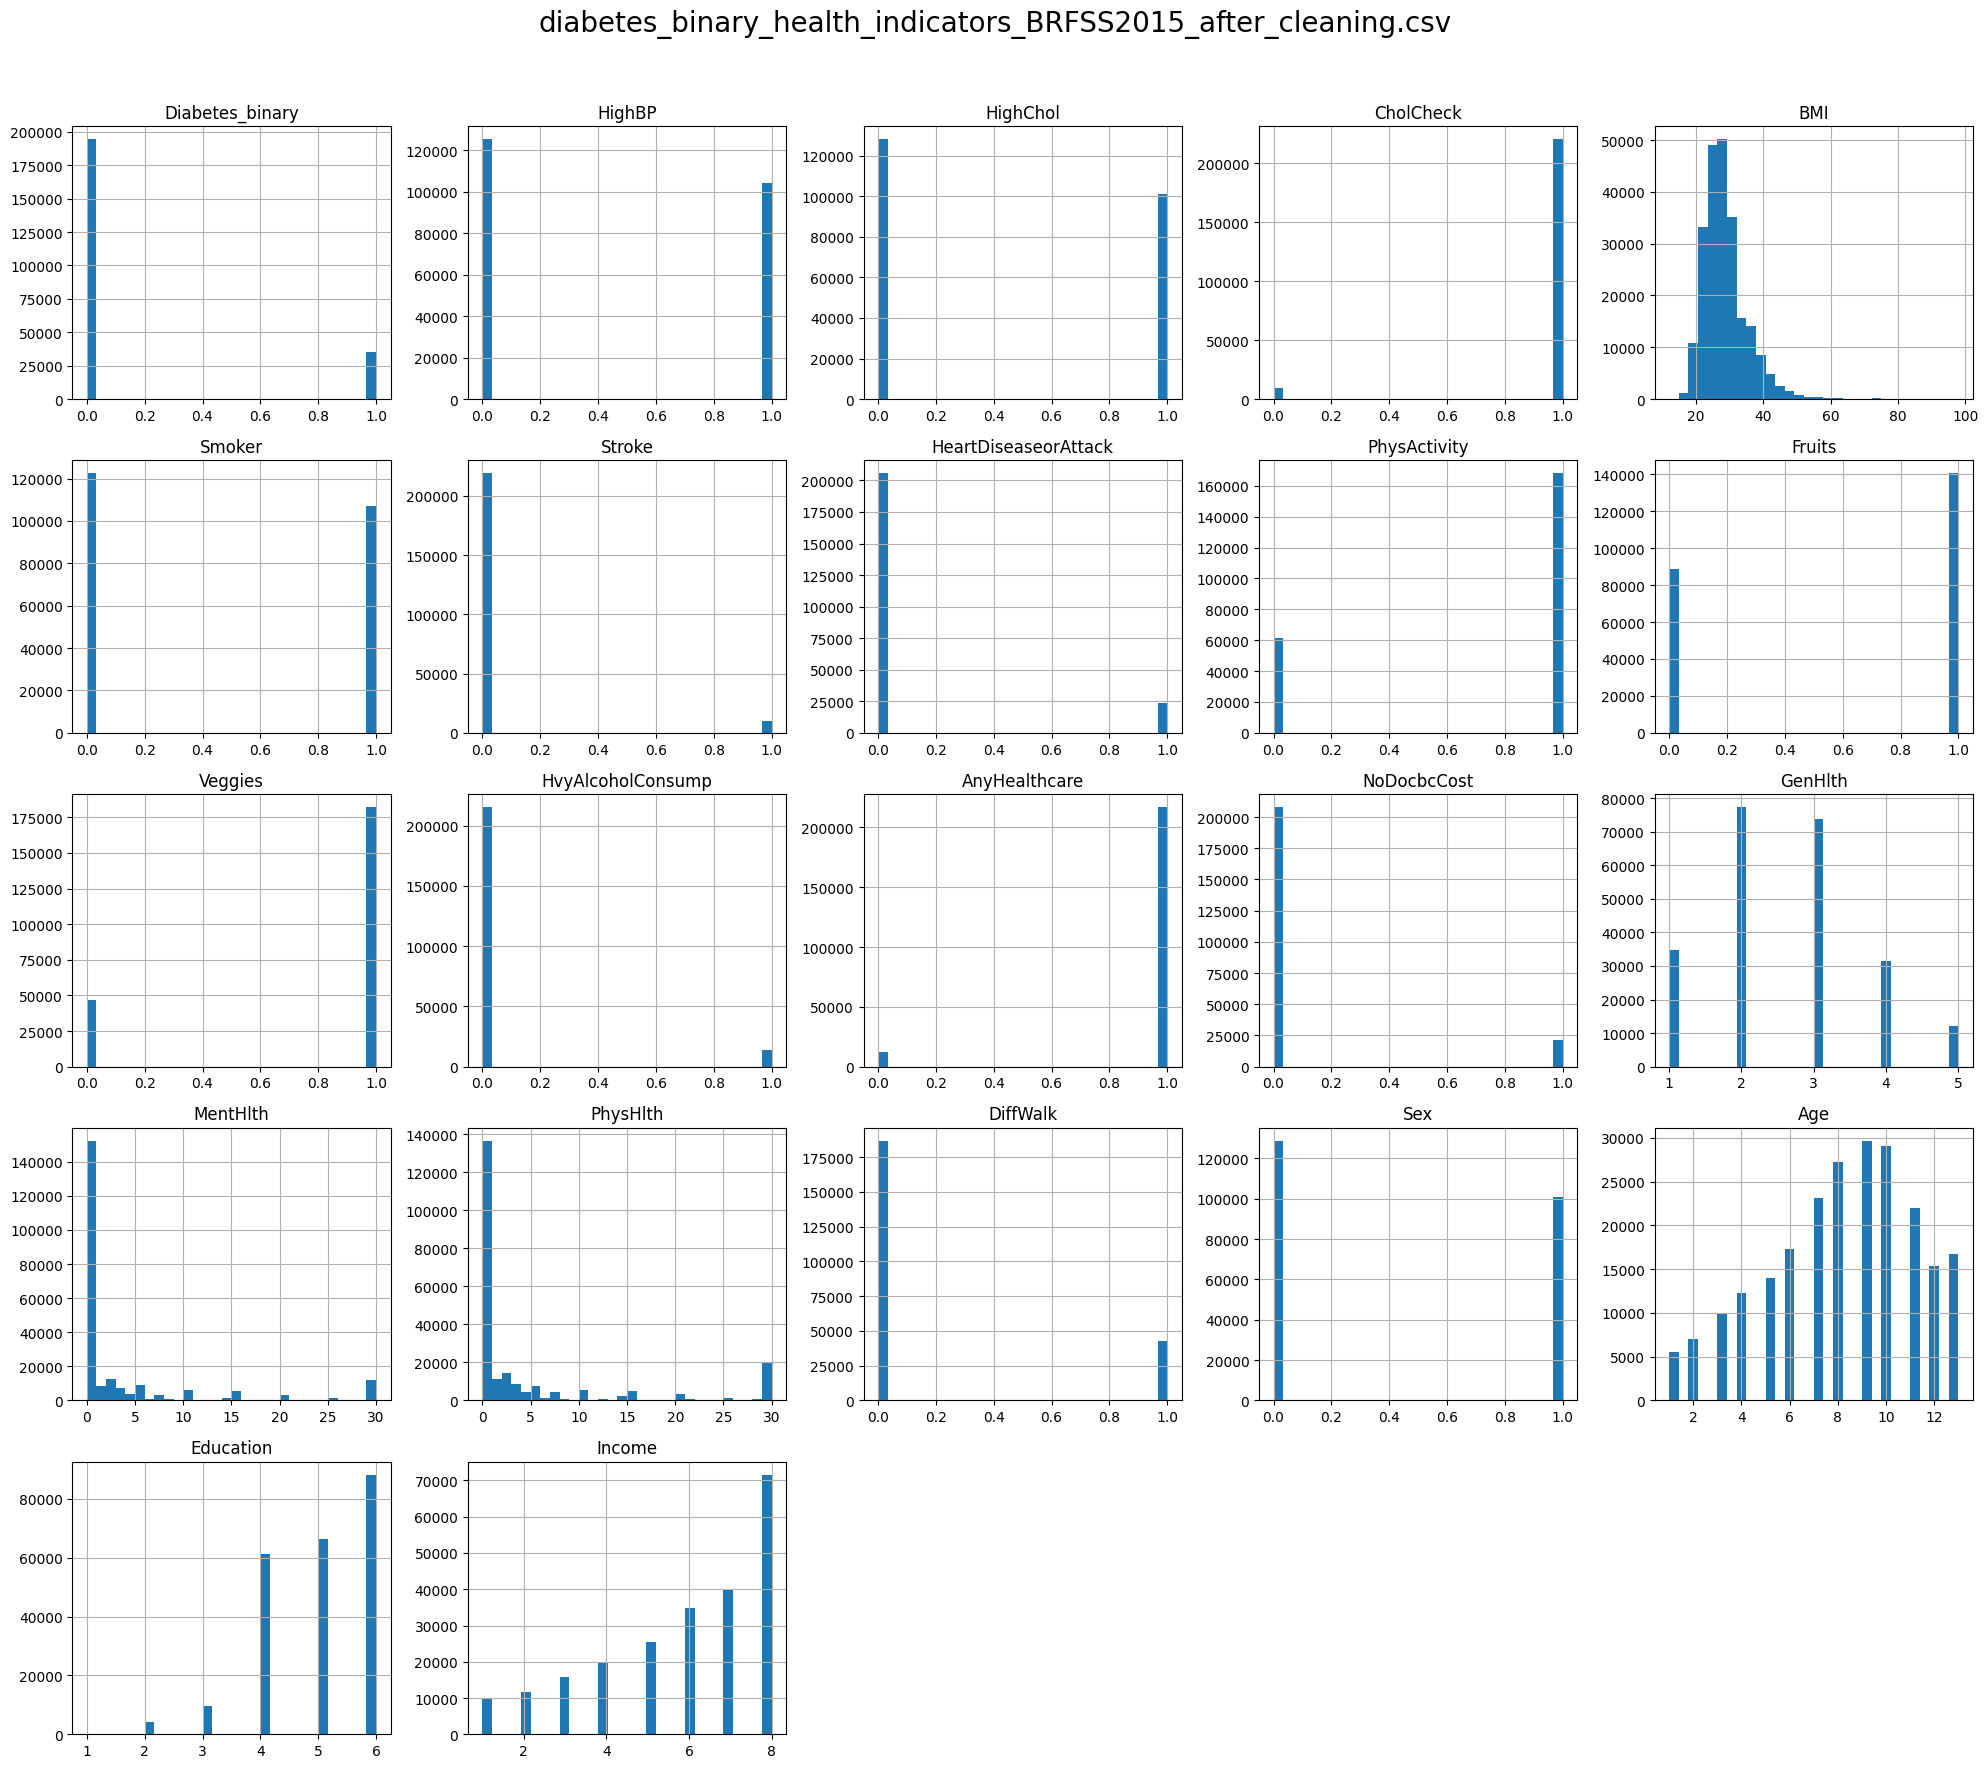

In [17]:
num_cols_d1_a_c = data_cleaned.select_dtypes(include=["number"]).columns
cat_cols_d1_a_c = data_cleaned.select_dtypes(exclude=["number"]).columns

data_cleaned[num_cols_d1_a_c].hist(figsize=(20, 18), bins=30)

plt.suptitle("diabetes_binary_health_indicators_BRFSS2015_after_cleaning.csv", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/diabetes_binary_health_indicators_BRFSS2015_after_cleaning_columns_graphs.jpg")

plt.show()

In [18]:
data_cleaned.isna().sum()[data_cleaned.isna().sum()>0]

Series([], dtype: int64)

## DEEP DIVE
Back to [Index](#index)

- Class distribution

/tmp/ipykernel_5188/1084929406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


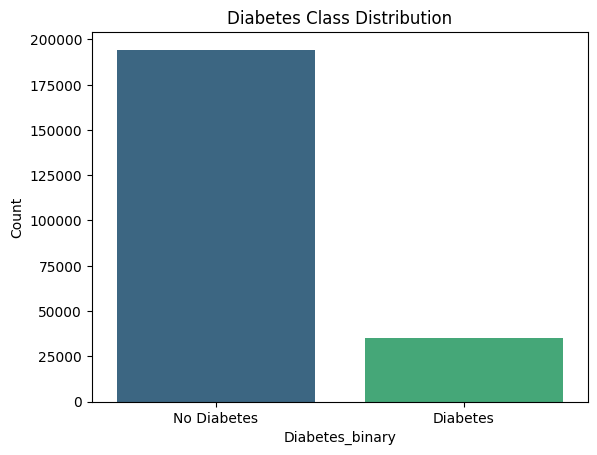

Class Breakdown:
  No Diabetes: 194,377 samples (84.71%)
  Diabetes: 35,097 samples (15.29%)


In [27]:
# Distribution count
class_counts = data_cleaned['Diabetes_binary'].value_counts()
class_percentages = data_cleaned['Diabetes_binary'].value_counts(normalize=True) * 100

# Plot
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel("Count")
plt.title("Diabetes Class Distribution")
plt.show()

# Print stats
print("Class Breakdown:")
for label, count in class_counts.items():
    percentage = class_percentages[label]
    label_text = "Diabetes" if label == 1 else "No Diabetes"
    print(f"  {label_text}: {count:,} samples ({percentage:.2f}%)")

- Categorical variables

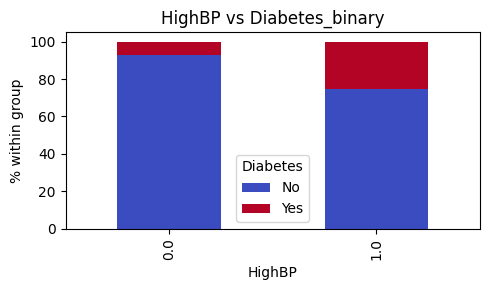

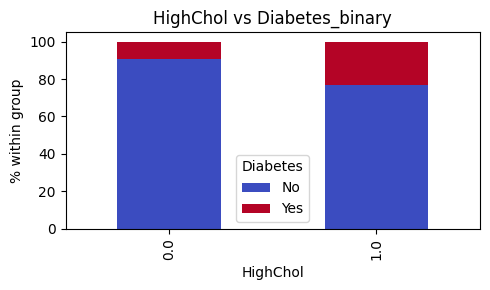

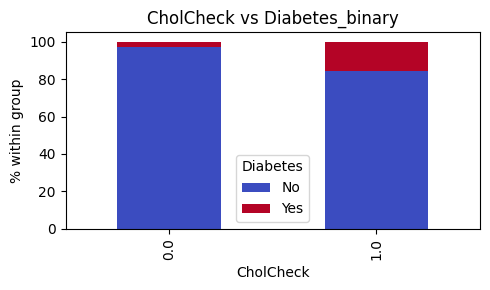

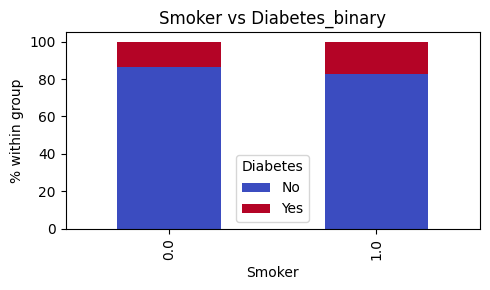

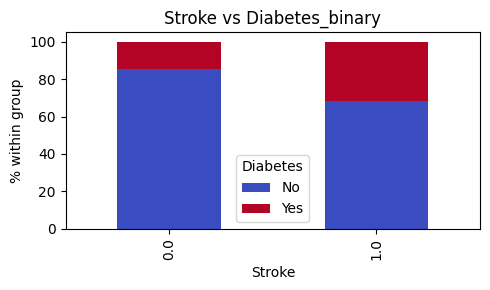

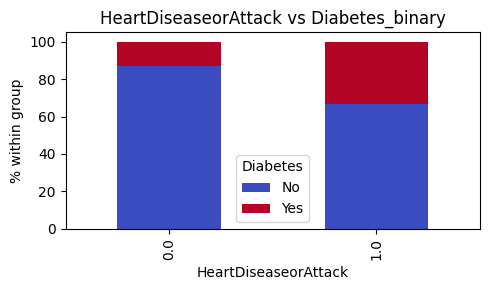

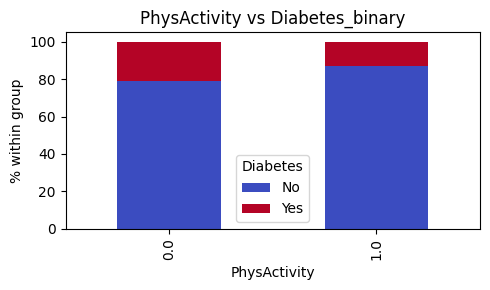

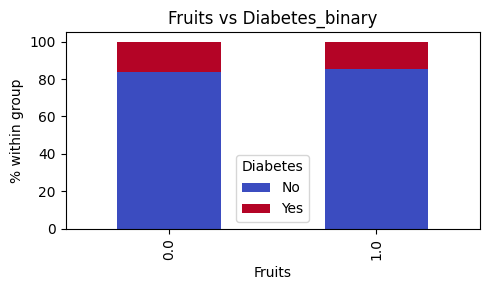

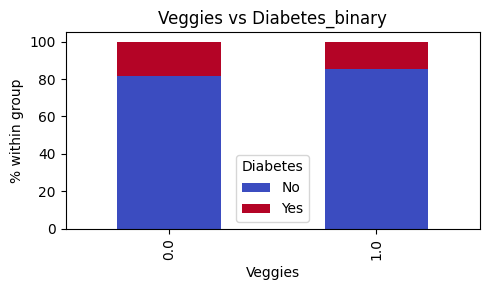

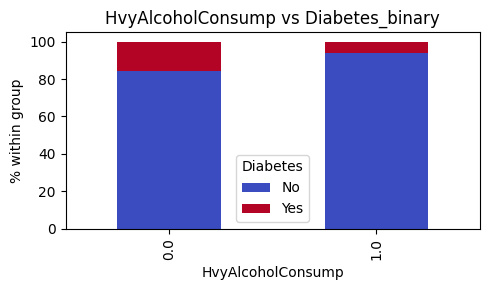

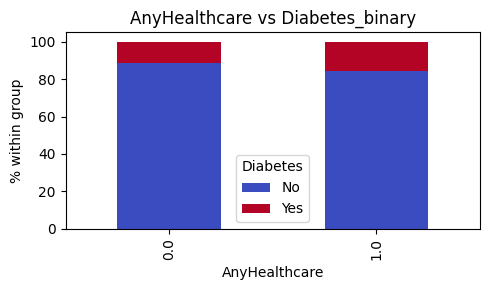

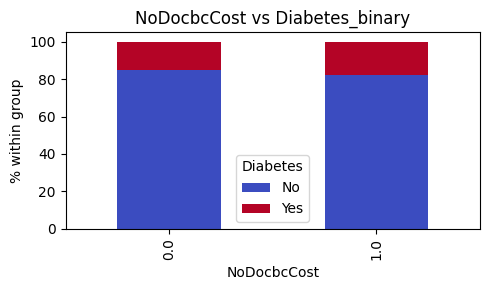

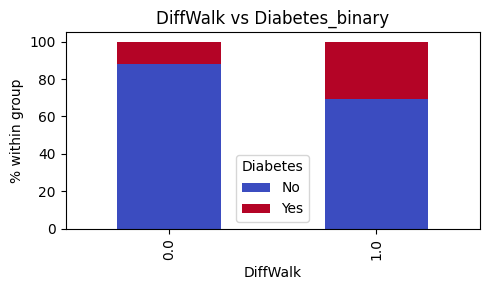

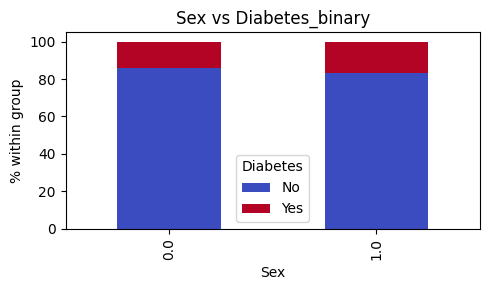

In [29]:
binary_vars = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", 
    "DiffWalk", "Sex"
]

for var in binary_vars:
    cross = pd.crosstab(data_cleaned[var], data_cleaned["Diabetes_binary"], normalize='index') * 100
    cross.plot(kind='bar', stacked=True, figsize=(5, 3), colormap="coolwarm")
    plt.title(f"{var} vs Diabetes_binary")
    plt.ylabel("% within group")
    plt.xlabel(var)
    plt.legend(title="Diabetes", labels=["No", "Yes"])
    plt.tight_layout()
    plt.show()